In [63]:
# Installing  basic python packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

# For Performance Tunning the model.
from sklearn.model_selection import GridSearchCV


In [64]:
# import data set
# Note: please make the dataset available in the path

FF_data = pd.read_csv("forestfires.csv")
FF_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [65]:
FF_data.shape

(517, 13)

In [66]:
FF_data.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [67]:
# Checking the data  
FF_data.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


In [68]:
## Checking NULL values in the data frame
FF_data.isnull().values.any() 

False

In [69]:
FF_data.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

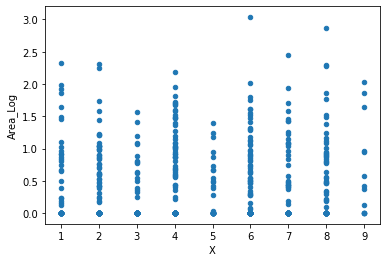

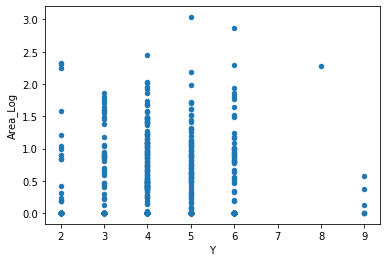

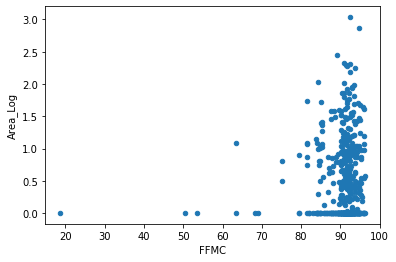

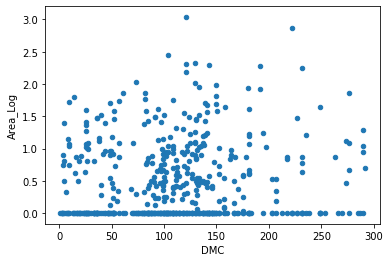

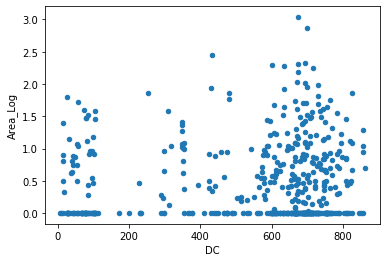

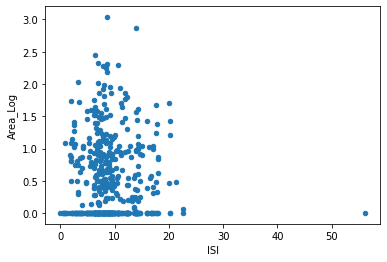

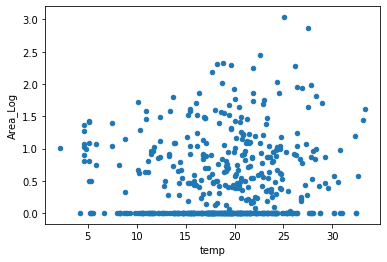

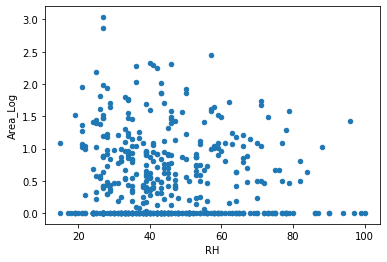

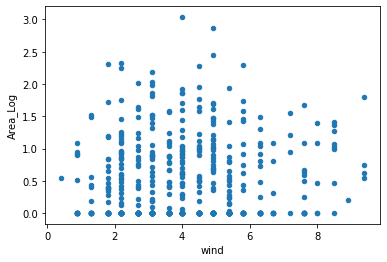

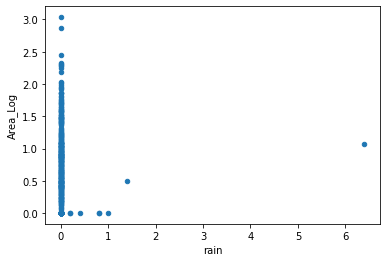

In [70]:
FF_data['Area_Log']=np.log10(FF_data['area']+1)
for i in FF_data.describe().columns[:-2]:
    FF_data.plot.scatter(i, 'Area_Log')
    plt.show()

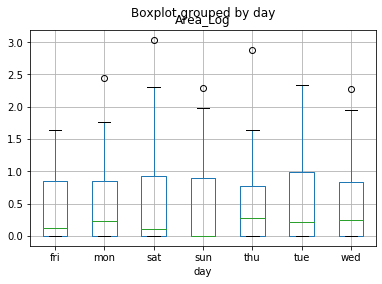

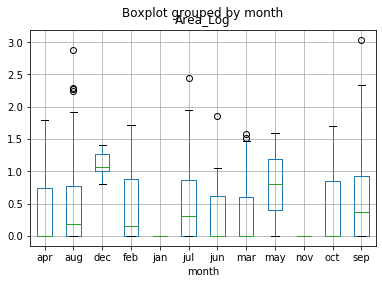

In [71]:
# Box plots

FF_data.boxplot(column='Area_Log',by='day')
FF_data.boxplot(column='Area_Log',by='month')
plt.show()

In [72]:
Labenco = LabelEncoder()
Labenco.fit(FF_data['month'])
Labenco.classes_

array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'sep'], dtype=object)

In [73]:
FF_data["mon_num"]=Labenco.transform(FF_data["month"])
FF_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Area_Log,mon_num
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,7
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,10
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,10
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,7
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,7


In [74]:
Labenco.fit(FF_data['day'])
Labenco.classes_

array(['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'], dtype=object)

In [75]:
FF_data["day_num"]=Labenco.transform(FF_data["day"])
FF_data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,Area_Log,mon_num,day_num
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0,7,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0,10,5
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0,10,2
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0,7,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0,7,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C753EEF448>,
      dtype=object)

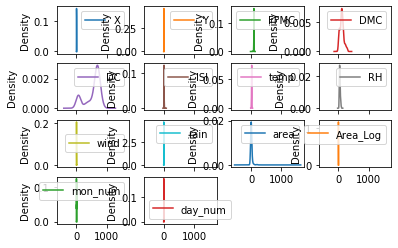

In [76]:

# Plot the Density plot
FF_data.plot(kind='density', subplots=True, layout=(4,4))

In [77]:
# check the column names
FF_data.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area', 'Area_Log', 'mon_num', 'day_num'],
      dtype='object')

In [78]:
# To make the output stable across runs
np.random.seed(42)

In [79]:
## Drop few unwanted columns in the data set

X_FF_data = FF_data.drop(['area','Area_Log','month','day'],axis=1)
Y_FF_data = FF_data['Area_Log']

X_TrainData, X_TestData, y_TrainData, y_TestData = train_test_split(X_FF_data, Y_FF_data, test_size = 0.25, random_state=12)

y_TrainData = y_TrainData.values.reshape(y_TrainData.size,1)

In [80]:
# check the columns names -- just cross verifying the columns.
print(X_TrainData.columns)
print(X_TestData.columns)
print(y_TrainData)
print(y_TestData)

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'mon_num', 'day_num'],
      dtype='object')
Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'mon_num', 'day_num'],
      dtype='object')
[[0.        ]
 [0.73319727]
 [0.        ]
 [0.42975228]
 [0.96189547]
 [0.        ]
 [0.        ]
 [0.46982202]
 [1.13481437]
 [0.        ]
 [0.372912  ]
 [0.        ]
 [0.        ]
 [0.86687781]
 [0.7201593 ]
 [1.81358099]
 [0.        ]
 [0.77524626]
 [0.        ]
 [1.49387611]
 [0.16731733]
 [0.        ]
 [0.22530928]
 [1.02978947]
 [0.        ]
 [0.        ]
 [0.94101424]
 [0.91434316]
 [0.61172331]
 [0.92220628]
 [0.92427929]
 [0.42160393]
 [0.40823997]
 [1.01745073]
 [0.90417437]
 [0.        ]
 [0.        ]
 [1.03981055]
 [0.        ]
 [0.09342169]
 [0.23299611]
 [0.        ]
 [0.43933269]
 [0.        ]
 [0.80140371]
 [0.4345689 ]
 [0.34830486]
 [0.        ]
 [2.44642842]
 [0.        ]
 [0.50242712]
 [0.        ]
 [0.        ]
 [0.

In [96]:
## implimenting the Random Forest Regressor
print('Random Forest Regressor')

## set time to compare the performance
import time
t0 = time.time()


RF_Model = RandomForestRegressor()

RF_Model.fit(X_TrainData,y_TrainData)

Random Forest Regressor


C:\Users\datas\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


RandomForestRegressor()

In [97]:
# Import the required packages
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

## Predict the X test data
RF_pred_model = RF_Model.predict(X_TestData)

score = explained_variance_score(y_TestData, RF_pred_model)

Mean_Absolute_Error = mean_absolute_error(RF_pred_model, y_TestData)


# Model run Time 
run_time_sim = time.time() - t0

# Print the time taken to run simple model
print('Run time for simple model %.3f s' % run_time_sim)

Run time for simple model 4.004 s


In [83]:
## Print the result
print("Score:", score)
print("Mean Absolute Error:", Mean_Absolute_Error)

Score: -0.08835735799377131
Mean Absolute Error: 0.5438626330092395


In [84]:
## Calculating RMSE 
from math import sqrt
RMSE_RF = sqrt(Mean_Absolute_Error)


# Print the results
print("Root Mean Square Error:", RMSE_RF)

# RMSE values tells the performance of the model, smaller the RMSE value better the results.

Root Mean Square Error: 0.7374704285659457


In [85]:
## Now let us performe the Model tunning using GridSearchCV
# To check the performace of the model let me set the time

t0 = time.time()

In [86]:
# Defining the Parameters grid for Random Forest, for num of node, depth.

Par_Grid = {'max_depth': [5,10,15,20,25,30,35,40,45,50], 
            'max_leaf_nodes': [2,5,10], 
            'min_samples_leaf': [2,5,10],
             'min_samples_split':[2,5,10]}


Model_RFR = GridSearchCV(RandomForestRegressor(), 
                         Par_Grid, 
                         refit=True, 
                         verbose=0, 
                         cv=10)

Model_RFR.fit(X_TrainData,y_TrainData.ravel())

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
                         'max_leaf_nodes': [2, 5, 10],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [87]:
# Model run Time 
run_time_tune = time.time() - t0

In [88]:
# Print the time taken to run the tuned model.
print('Run time for tuned model %.3f s' % run_time_tune)

Run time for tuned model 653.086 s


In [98]:
print(Model_RFR.best_params_)

{'max_depth': 20, 'max_leaf_nodes': 2, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [99]:
## Build the model using the above parameters

RF_Model_tuned = RandomForestRegressor(max_depth = 20, max_leaf_nodes = 2,
                                min_samples_leaf = 5, min_samples_split = 5)

RF_Model_tuned.fit(X_TrainData,y_TrainData)


C:\Users\datas\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=20, max_leaf_nodes=2, min_samples_leaf=5,
                      min_samples_split=5)

In [100]:
RF_Tuned_Pred = RF_Model_tuned.predict(X_TestData)
RF_Tuned_Pred

array([0.44471108, 0.44860683, 0.46626549, 0.42513765, 0.44899086,
       0.42864332, 0.4440173 , 0.47694781, 0.53936967, 0.4818209 ,
       0.48431266, 0.43594703, 0.4546642 , 0.48868753, 0.45768303,
       0.52337736, 0.43227356, 0.47434955, 0.42521208, 0.50571031,
       0.53292115, 0.45148866, 0.49644231, 0.44339441, 0.46457691,
       0.45011778, 0.44088974, 0.50971661, 0.42623774, 0.45768303,
       0.47045702, 0.45757507, 0.41929603, 0.41827533, 0.41353925,
       0.41149339, 0.559118  , 0.44094487, 0.51585441, 0.52198148,
       0.51855406, 0.47032547, 0.46656764, 0.50764537, 0.4515777 ,
       0.50746753, 0.44343454, 0.42185257, 0.4677704 , 0.4315586 ,
       0.46153083, 0.46829326, 0.45320488, 0.53718538, 0.47181133,
       0.41107383, 0.49929284, 0.53275781, 0.46213556, 0.47041853,
       0.45436337, 0.42297276, 0.46621785, 0.42166024, 0.51697852,
       0.45880692, 0.41768559, 0.42359698, 0.47913622, 0.45809705,
       0.46255145, 0.45564394, 0.44778995, 0.43160508, 0.42541

In [101]:
# Calculating the Mean Absolute error after tuning

MAS_tuned = mean_absolute_error(RF_Tuned_Pred, y_TestData)
print("Mean Absolute Error after tunning:", MAS_tuned)

Mean Absolute Error after tunning: 0.5257555259624443


In [102]:
# Calculating the Root Mean Square Error for the tuned model

RFR_Model_RMSE = np.sqrt(np.mean((y_TestData-RF_Tuned_Pred)**2))
print("Random Forest Model - RMSE values: ",RFR_Model_RMSE)

Random Forest Model - RMSE values:  0.6262425411358233
